In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from statistics import median,mean
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score


In [3]:
data = pd.read_csv('../input/bankdataset/bank-full - Govindaraj V.csv') 
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
print('\033[1m''Number of rows in dataframe',data.shape[0]) 
print('\033[1m''Number of features in dataframe',data.shape[1]) 

Number of rows in dataframe 45211
Number of features in dataframe 17


In [6]:
data.dtypes.to_frame('Datatypes of attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object


In [8]:
data.isnull().sum().to_frame('Presence of missing values').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Presence of missing values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [11]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [12]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [13]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [16]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [17]:
data.loc[data['pdays'] == 999]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

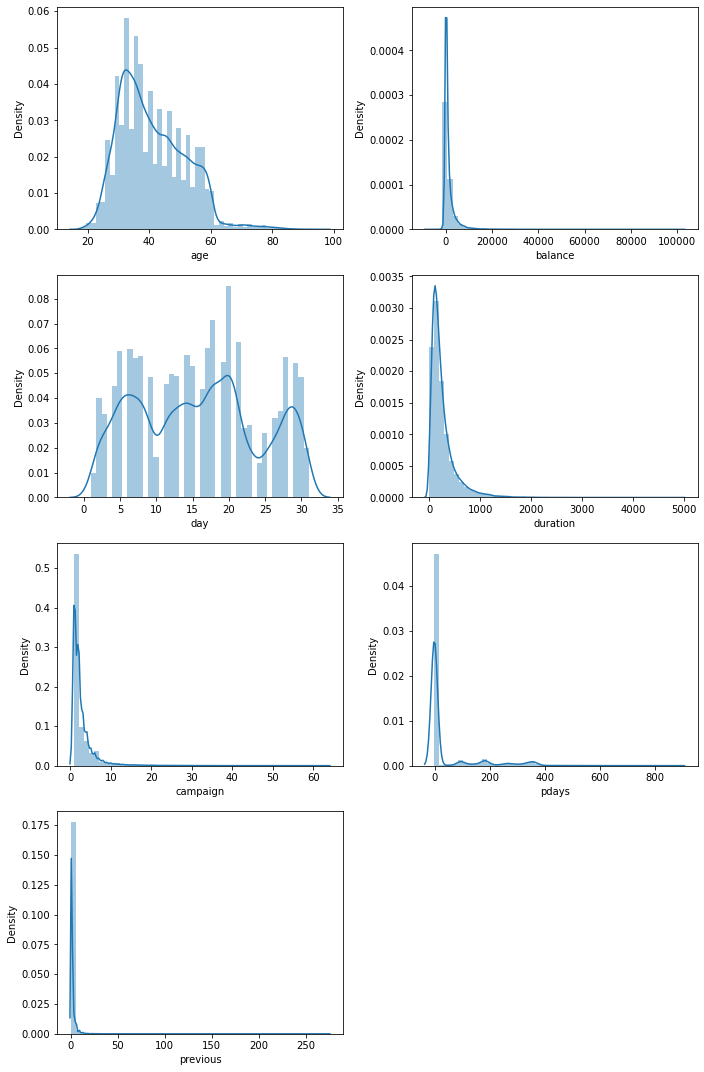

In [18]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) 
axe = axe.flatten()
sns.distplot(data['age'],ax=axe[0]) 
sns.distplot(data['balance'],ax=axe[1])
sns.distplot(data['day'],ax=axe[2])
sns.distplot(data['duration'],ax=axe[3])
sns.distplot(data['campaign'],ax=axe[4])
sns.distplot(data['pdays'],ax=axe[5])
sns.distplot(data['previous'],ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

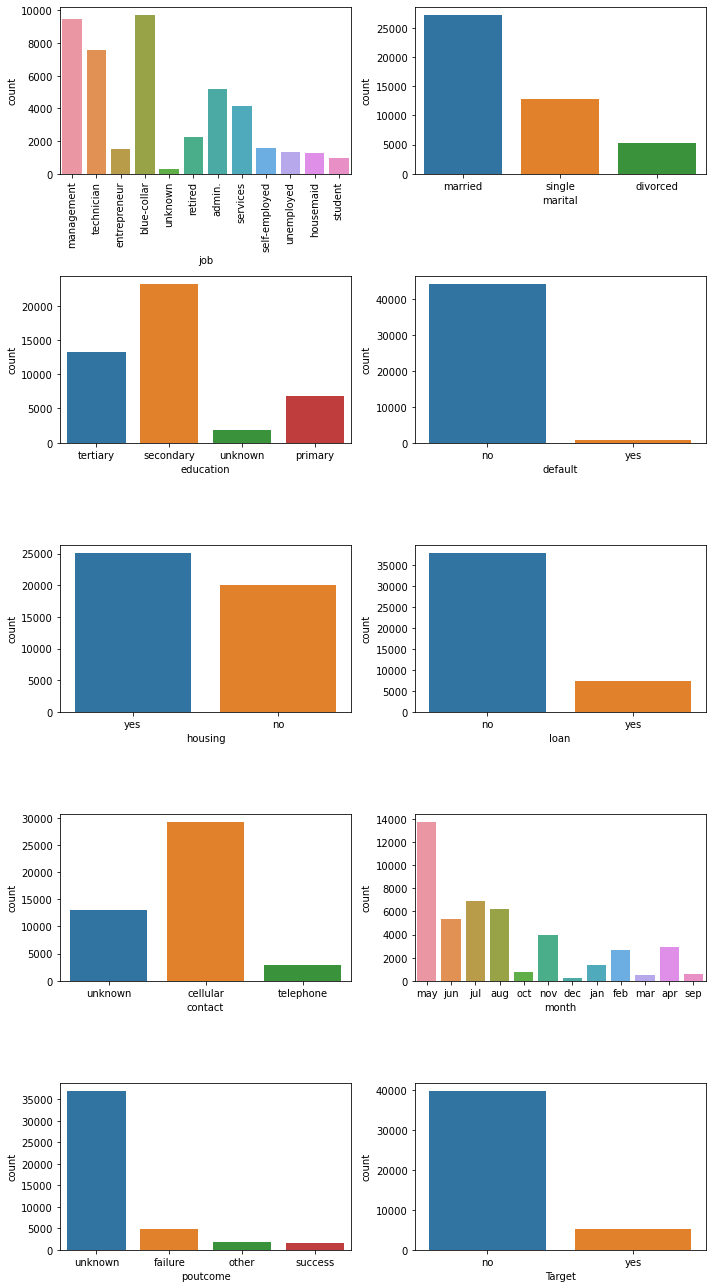

In [23]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe = axe.flatten()
plot=sns.countplot(x=data['job'],data=data,ax=axe[0])
plt.setp(plot.get_xticklabels(), rotation=90)
sns.countplot(x=data['marital'],data=data,ax=axe[1]) 
sns.countplot(x=data['education'],data=data,ax=axe[2])
sns.countplot(x=data['default'],data=data,ax=axe[3])
sns.countplot(x=data['housing'],data=data,ax=axe[4]) 
sns.countplot(x=data['loan'],data=data,ax=axe[5])
sns.countplot(x=data['contact'],data=data,ax=axe[6])
sns.countplot(x=data['month'],data=data,ax=axe[7])
sns.countplot(x=data['poutcome'],data=data,ax=axe[8]) 
sns.countplot(x=data['Target'],data=data,ax=axe[9])
fig.tight_layout()
fig.show()

In [24]:
data.skew().to_frame('Skewness measure')

,Skewness measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


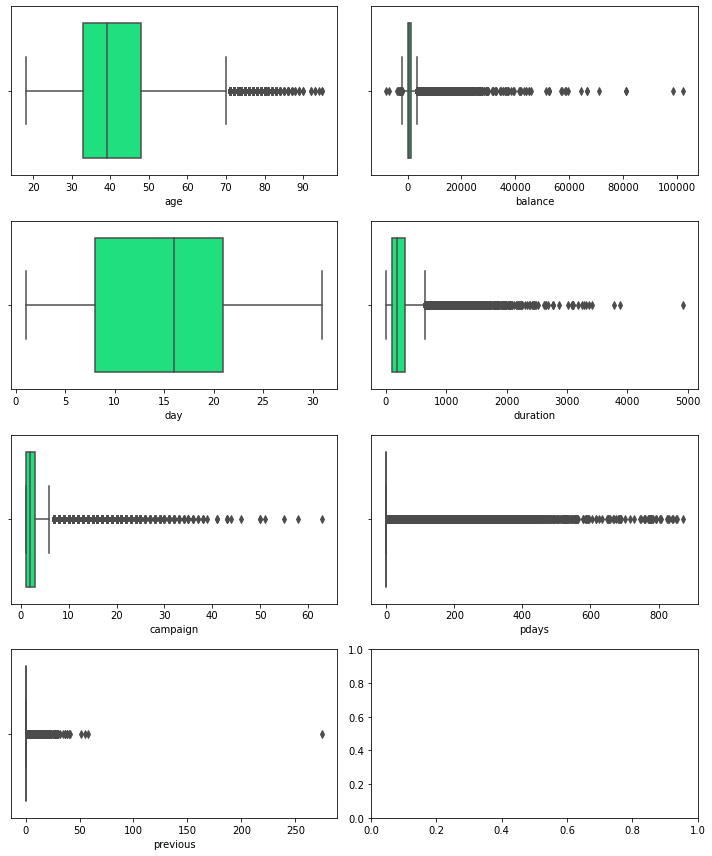

In [25]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()
sns.boxplot(x='age',data=data,color='springgreen',ax=axe[0]) 
sns.boxplot(x='balance',data=data,color='springgreen',ax=axe[1]) 
sns.boxplot(x='day',data=data,color='springgreen',ax=axe[2]) 
sns.boxplot(x='duration',data=data,color='springgreen',ax=axe[3]) 
sns.boxplot(x='campaign',data=data,color='springgreen',ax=axe[4])
sns.boxplot(x='pdays',data=data,color='springgreen',ax=axe[5])
sns.boxplot(x='previous',data=data,color='springgreen',ax=axe[6]) 
fig.tight_layout()
fig.show()

In [27]:
data['Target'].value_counts().to_frame('Target column distriution')

,Target column distriution
no,39922
yes,5289


In [28]:
df_2 = data.copy()
encoder = LabelEncoder() 
df_2['default'] = encoder.fit_transform(df_2['default']).astype(int) 
df_2['marital'] = encoder.fit_transform(df_2['marital']).astype(int)
df_2['loan'] = encoder.fit_transform(df_2['loan']).astype(int)
df_2['housing'] = encoder.fit_transform(df_2['housing']).astype(int)
df_2['Target'] = encoder.fit_transform(df_2['Target']).astype(int)
df_2['month'] = encoder.fit_transform(df_2['month']).astype(int)
df_2['poutcome'] = encoder.fit_transform(df_2['poutcome']).astype(int)
df_2['education'] = encoder.fit_transform(df_2['education']).astype(int)
df_2.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


In [29]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  int64 
 3   education  45211 non-null  int64 
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  int64 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  int64 
 16  Target     45211 non-null  int64 
dtypes: int64(15), object(2)
memory usage: 5.9+ MB


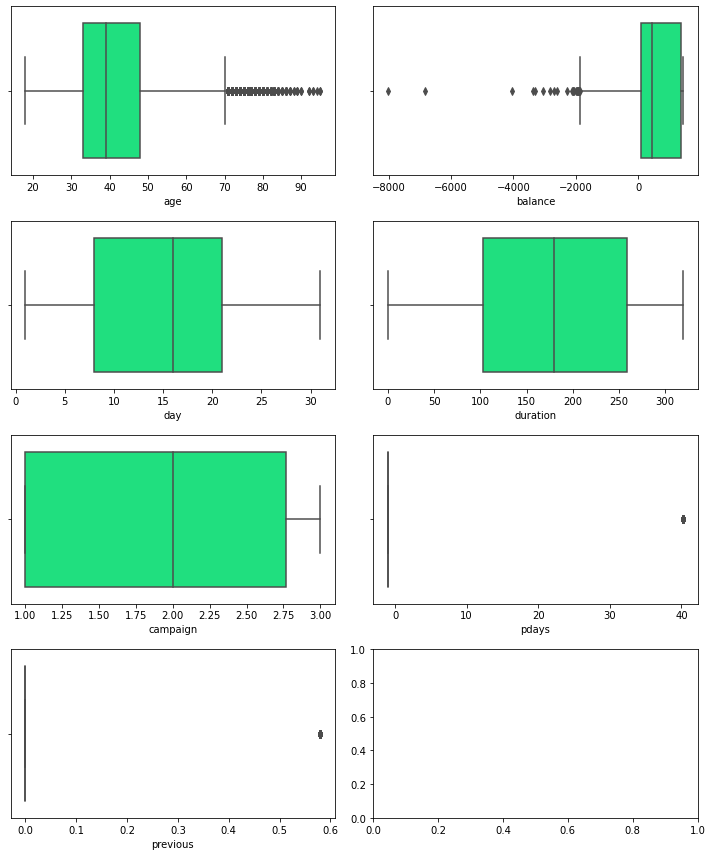

In [30]:
meanbal = float(df_2['balance'].mean()) #mean balance
df_2['balance'] = np.where(df_2['balance'] >np.percentile(df_2['balance'], 75), meanbal,df_2['balance']) #replacing with mean

meandur = float(df_2['duration'].mean()) #mean duration
df_2['duration'] = np.where(df_2['duration'] >np.percentile(df_2['duration'], 75), meandur,df_2['duration'])#replacing with mean

meancam = float(df_2['campaign'].mean()) #mean campaign
df_2['campaign'] = np.where(df_2['campaign'] >np.percentile(df_2['campaign'], 75), meancam,df_2['campaign'])#replacing with mean

meanpd = float(df_2['pdays'].mean()) #mean pdays
df_2['pdays'] = np.where(df_2['pdays'] >np.percentile(df_2['pdays'], 75), meanpd,df_2['pdays'])#replacing with mean

meanpr = float(df_2['previous'].mean()) #mean previous
df_2['previous'] = np.where(df_2['previous'] >np.percentile(df_2['previous'], 75),meanpr ,df_2['previous'])#replacing with mean



fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()#to flatten subplot index positions
sns.boxplot(x='age',data=df_2,color='springgreen',ax=axe[0]) #Box plot of 'ID' for finding outliers 
sns.boxplot(x='balance',data=df_2,color='springgreen',ax=axe[1]) #Box plot of 'Family' 
sns.boxplot(x='day',data=df_2,color='springgreen',ax=axe[2]) #Box plot of 'Personal Loan' 
sns.boxplot(x='duration',data=df_2,color='springgreen',ax=axe[3]) #Box plot of 'CD Account' 
sns.boxplot(x='campaign',data=df_2,color='springgreen',ax=axe[4]) #Box plot of 'Online' 
sns.boxplot(x='pdays',data=df_2,color='springgreen',ax=axe[5]) #Box plot of 'CreditCard'
sns.boxplot(x='previous',data=df_2,color='springgreen',ax=axe[6]) #Box plot of 'CreditCard' 
fig.tight_layout() #for arranging the plots
fig.show() #display plots

In [31]:
df_2 = pd.get_dummies(df_2,columns=['housing','default','loan','poutcome'])

In [33]:
df_2.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,...,housing_0,housing_1,default_0,default_1,loan_0,loan_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3
0,58,management,1,2,1362.272058,unknown,5,8,261.0,1.0,...,0,1,1,0,1,0,0,0,0,1
1,44,technician,2,1,29.000000,unknown,5,8,151.0,1.0,...,0,1,1,0,1,0,0,0,0,1
2,33,entrepreneur,1,1,2.000000,unknown,5,8,76.0,1.0,...,0,1,1,0,0,1,0,0,0,1
3,47,blue-collar,1,3,1362.272058,unknown,5,8,92.0,1.0,...,0,1,1,0,1,0,0,0,0,1
4,33,unknown,2,3,1.000000,unknown,5,8,198.0,1.0,...,1,0,1,0,1,0,0,0,0,1


<AxesSubplot:>

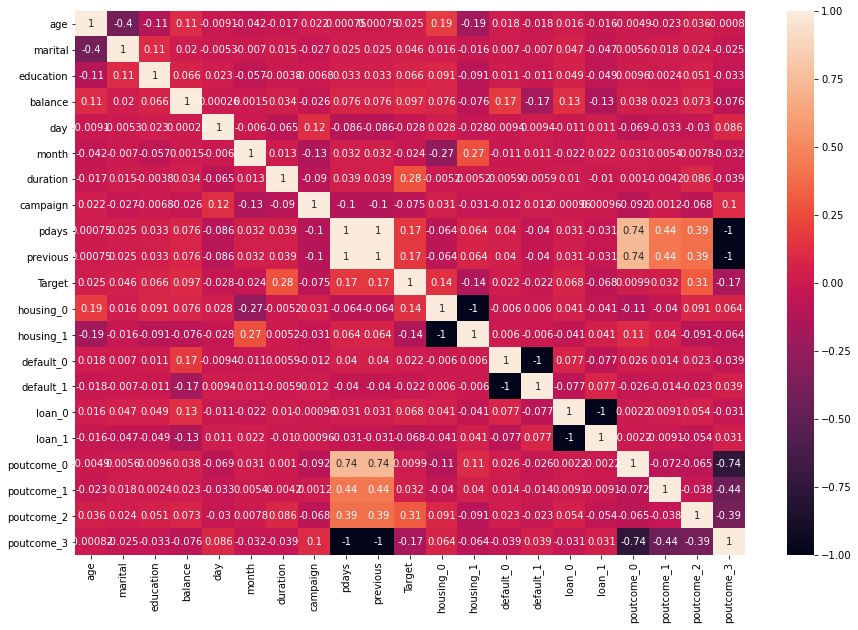

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df_2.corr(),annot=True)

In [35]:
df_2 = df_2.drop(['job','education','contact','duration','pdays','day','month'],axis=1)

In [36]:
df_2.head()

,age,marital,balance,campaign,previous,Target,housing_0,housing_1,default_0,default_1,loan_0,loan_1,poutcome_0,poutcome_1,poutcome_2,poutcome_3
0,58,1,1362.272058,1.0,0.0,0,0,1,1,0,1,0,0,0,0,1
1,44,2,29.000000,1.0,0.0,0,0,1,1,0,1,0,0,0,0,1
2,33,1,2.000000,1.0,0.0,0,0,1,1,0,0,1,0,0,0,1
3,47,1,1362.272058,1.0,0.0,0,0,1,1,0,1,0,0,0,0,1
4,33,2,1.000000,1.0,0.0,0,1,0,1,0,1,0,0,0,0,1


In [37]:
y = df_2['Target']
X = df_2.drop('Target',axis=1) 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [39]:
logic_r = LogisticRegression(solver='liblinear')
logic_r.fit(X_train_scaled,y_train)
y_pred = logic_r.predict(X_test_scaled)

In [40]:
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('-'*40)
LR_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy))
print('-'*40)

Confusion Matrix
 [[11882   131]
 [ 1290   261]]
----------------------------------------
Accuracy of Logistic Regression :0.90
----------------------------------------


In [41]:
NB = GaussianNB() 
NB.fit(X_train_scaled,y_train) 
y_predi = NB.predict(X_test_scaled)

In [42]:
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('-'*40)
NB_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Naive Bayes :{:.2f}'.format(NB_accuracy))
print('-'*40)

Confusion Matrix
 [[11882   131]
 [ 1290   261]]
----------------------------------------
Accuracy of Naive Bayes :0.90
----------------------------------------


In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled,y_train)
y_predict = knn.predict(X_test_scaled)

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi))
print('-'*30)
KNN_accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy))

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[10701  1312]
 [  997   554]]
------------------------------
Accuracy of KNN :0.87


optimal k is 13


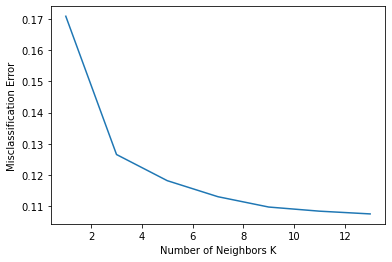

In [45]:
oddList = list(np.arange(1,15)) #Range from 1 to 15
neighbors = list(filter(lambda x: x % 2 != 0, oddList)) #Selecting only odd numbers from Range 1 to 24

accuracy_list = [] #Empty list to store accuracy scores of KNN models based on various K values

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i) #Instantiate KNN with k=i
    knn.fit(X_train_scaled,y_train)  #Call the fit method of KNN to train the model or to learn the parameters of model
    y_pred = knn.predict(X_test_scaled) #Predict 
    accuracy_s = accuracy_score(y_test,y_pred) #for accuracy score
    accuracy_list.append(accuracy_s)  #for appedning accuracy score to accuracy score list
    
MSE=[1 - j for j in accuracy_list] #calculation of Mean Squared Error

optimal = neighbors[MSE.index(min(MSE))] #Optimal K value selected by minimum MSE
print('optimal k is',optimal) #Print optimal K value selected by minimum MSE

plt.plot(neighbors,MSE) #MSE plot 
plt.xlabel('Number of Neighbors K') #XLabel
plt.ylabel('Misclassification Error') #YLabel
plt.show() #display plot

In [47]:
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1) #Instantiate Bagging Classifier
bagc = bagc.fit(X_train, y_train) #Call the fit method of Bagging classifier to train the model or to learn the parameters of model
predicted_BAG = bagc.predict(X_test) #Predict


print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_BAG)) #for confusion matrix
print('-'*30)
BAG_accuracy = accuracy_score(y_test,predicted_BAG)
print('Accuracy of Decision Tree :{:.2f}'.format(BAG_accuracy)) 

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11605   408]
 [ 1222   329]]
------------------------------
Accuracy of Decision Tree :0.88


In [48]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1) #Instantiate Adaptive boosting Classifier
adab = adab.fit(X_train, y_train) #Call the fit method of Adaptive boosting Classifier to train the model or to learn the parameters of model
predicted_ADA = adab.predict(X_test) #Predict



print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ADA)) #for confusion matrix
print('-'*30)
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
print('Accuracy of KNN :{:.2f}'.format(ADA_accuracy))

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11877   136]
 [ 1298   253]]
------------------------------
Accuracy of KNN :0.89


In [49]:
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) #Instantiate Gradient boosting Classifier
gradb = gradb.fit(X_train, y_train)#Call the fit method of Gradient boosting Classifier to train the model or to learn the parameters of model
predicted_GRAD = gradb.predict(X_test) #Predict


print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_GRAD)) #for confusion matrix
print('-'*30)
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
print('Accuracy of KNN :{:.2f}'.format(GRAD_accuracy))

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11864   149]
 [ 1277   274]]
------------------------------
Accuracy of KNN :0.89


In [50]:
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3)#Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train) #Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RAN = randf.predict(X_test) #Predict

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RAN )) #for confusion matrix
print('-'*30)
RAN_accuracy = accuracy_score(y_test,predicted_RAN )
print('Accuracy of KNN :{:.2f}'.format(RAN_accuracy))

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[11552   461]
 [ 1221   330]]
------------------------------
Accuracy of KNN :0.88


In [51]:
Scores = [('Naive bayes', NB_accuracy),
      ('KNN', KNN_accuracy),
      ('Logistic Regression', LR_accuracy),
      ('Decision Tree',DT_accuracy),
      ('Bagging',BAG_accuracy),
      ('Adaptive Boosting',ADA_accuracy),
      ('Gradient Boosting',GRAD_accuracy),
      ('Random Forest N=100',RAN_accuracy),]

Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score']) #Conversion of list to dataframe

print('\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False)

NameError: name 'SVC_accuracy' is not defined

In [ ]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True, dashes=False) #Countplot of Scores
plt.xticks(rotation=90)
plt.show()